In [1]:
# Ana Lucía Cárdenas Pérez
# A01284090
# Momento Retroalimentación Módulo 2

In [2]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import load_iris

In [3]:
#Utilizaremos el dataset de iris el cual se puede cargar con scikit learn y guardamos data en "X" y target en "y".
iris = load_iris()

In [4]:
X = iris.data
y = iris.target

In [5]:
columns = iris.feature_names
df = pd.DataFrame(X, columns=columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
#Utilizamos train test split para poder separar los datos en 35% prueba, 65% entrenamiento y random state 1.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 1)

In [7]:
#Cambiamos el max depth del decision tree classifier a 3 con criterion de entropy.
myTree_entropy = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = 3)
myTree_entropy.fit(X_train, y_train)
#Guardaremos los valores predict de X_test en y_pred
y_pred = myTree_entropy.predict(X_test)

In [8]:
#imprimimos el decision tree con entropy y un max depth de 3.
print("\nDecision Tree con Entropy y Max Depth 3")
print(tree.export_text(myTree_entropy))


Decision Tree con Entropy y Max Depth 3
|--- feature_2 <= 2.60
|   |--- class: 0
|--- feature_2 >  2.60
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 5.00
|   |   |   |--- class: 1
|   |   |--- feature_2 >  5.00
|   |   |   |--- class: 2
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- class: 2
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



In [9]:
#Cambiamos el criterio a gini con max depth de 4
myTree_gini = tree.DecisionTreeClassifier(criterion="gini", max_depth = 4)
myTree_gini.fit(X_train, y_train)

y_pred_gini = myTree_gini.predict(X_test)

print("\nDecision Tree con Gini y Max Depth 4")
print(tree.export_text(myTree_gini))


Decision Tree con Gini y Max Depth 4
|--- feature_2 <= 2.60
|   |--- class: 0
|--- feature_2 >  2.60
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 5.00
|   |   |   |--- class: 1
|   |   |--- feature_2 >  5.00
|   |   |   |--- feature_0 <= 6.05
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  6.05
|   |   |   |   |--- class: 2
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



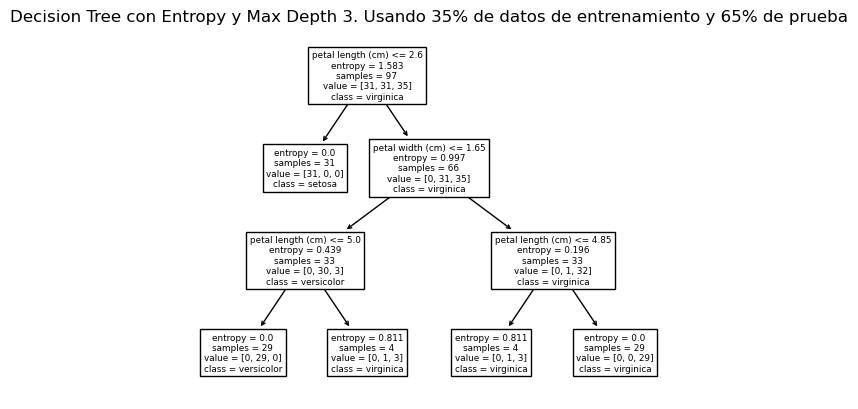

In [10]:
tree.plot_tree(myTree_entropy, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree con Entropy y Max Depth 3. Usando 35% de datos de entrenamiento y 65% de prueba")
plt.show()

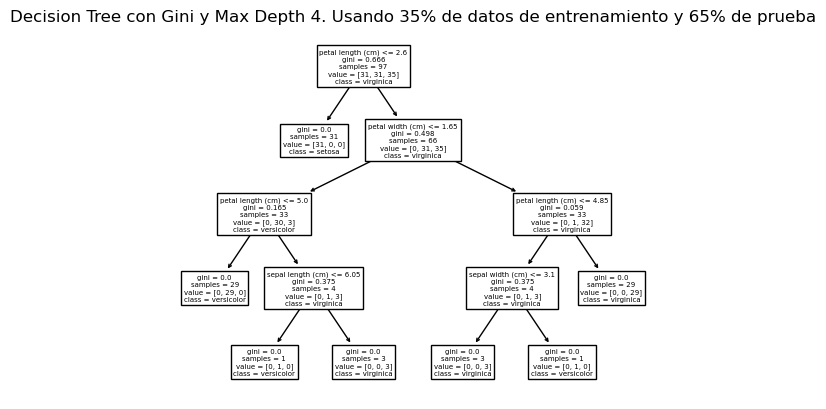

In [11]:
# Plotting the Decision Trees
tree.plot_tree(myTree_gini, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree con Gini y Max Depth 4. Usando 35% de datos de entrenamiento y 65% de prueba")

plt.show()